In [43]:
import pandas as pd
import numpy as np
import os
import klib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [44]:
# load the csv file
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Analysis and Preprocessing

In [45]:
df.shape

(5110, 12)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [47]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [48]:
df=df.drop(["id"], axis=1)
print(df.shape)
df.isnull().sum()

(5110, 11)


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [49]:
#replace NA in bmi values with mean 
df['bmi'] = df['bmi'].fillna(np.mean(df['bmi']))
df['bmi'].isnull().sum()

0

In [50]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [51]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [52]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [53]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [54]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [55]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [56]:
#Sampling target feature

# Class count
count_class_0, count_class_1 = df.stroke.value_counts()

# Divide by class
df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

In [57]:
# Oversample 1-class and concat the DataFrames of both classes

df_class_1_over = df_class_1.sample(3200, replace=True)
df = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df.stroke.value_counts())

Random over-sampling:
0    4861
1    3200
Name: stroke, dtype: int64


In [58]:
# shuffle data
df = shuffle(df)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1896,Female,25.0,0,0,No,Govt_job,Rural,74.11,34.100000,smokes,0
4932,Male,28.0,1,0,No,Private,Urban,86.61,38.600000,smokes,0
2426,Female,7.0,0,0,No,children,Urban,79.58,15.500000,Unknown,0
161,Male,71.0,0,1,Yes,Private,Urban,81.76,28.893237,smokes,1
69,Female,80.0,1,0,Yes,Self-employed,Rural,72.67,28.900000,never smoked,1


In [59]:
df.shape

(8061, 11)

## visualization

<AxesSubplot:xlabel='bmi', ylabel='Density'>

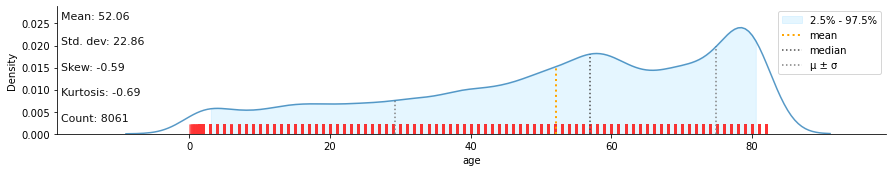

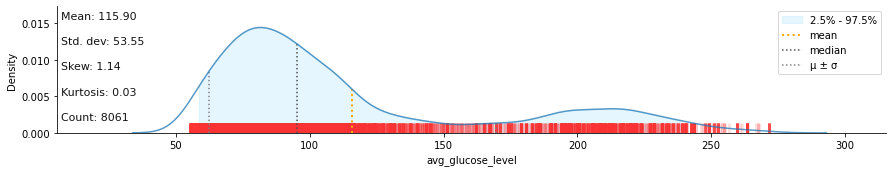

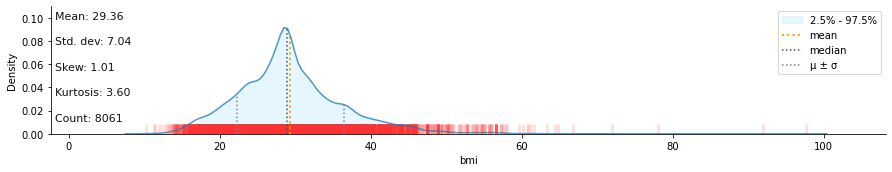

In [60]:
klib.dist_plot(df)

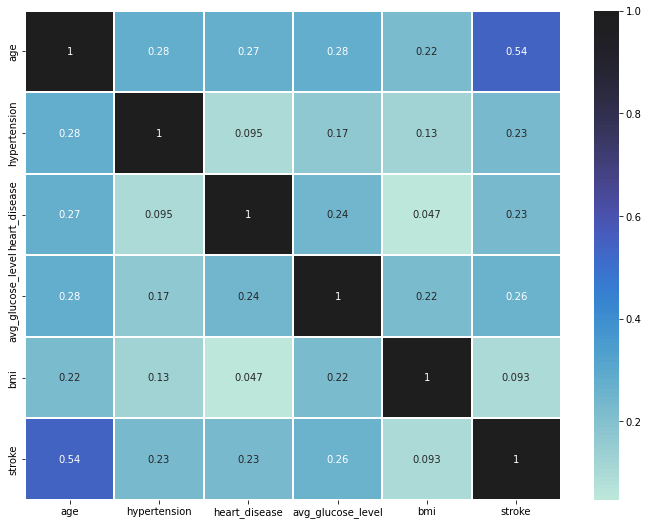

In [61]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,linewidths=2, center = True)
plt.show()

GridSpec(6, 5)

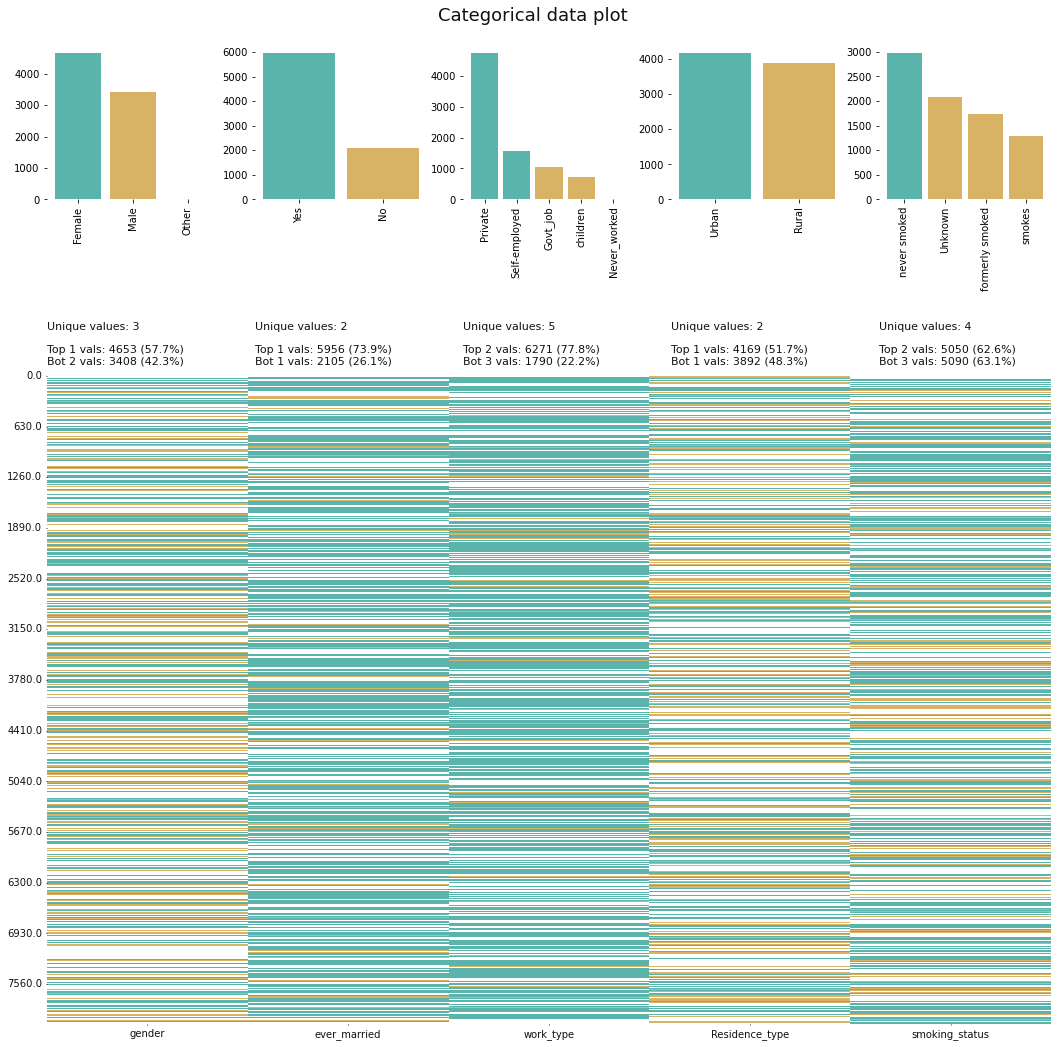

In [62]:
klib.cat_plot(df)

In [63]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1896,Female,25.0,0,0,No,Govt_job,Rural,74.11,34.100000,smokes,0
4932,Male,28.0,1,0,No,Private,Urban,86.61,38.600000,smokes,0
2426,Female,7.0,0,0,No,children,Urban,79.58,15.500000,Unknown,0
161,Male,71.0,0,1,Yes,Private,Urban,81.76,28.893237,smokes,1
69,Female,80.0,1,0,Yes,Self-employed,Rural,72.67,28.900000,never smoked,1


In [64]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df.gender=le.fit_transform(df.gender)
df.ever_married=le.fit_transform(df.ever_married)
df.work_type=le.fit_transform(df.work_type)
df.Residence_type=le.fit_transform(df.Residence_type)
df.smoking_status=le.fit_transform(df.smoking_status)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1896,0,25.0,0,0,0,0,0,74.11,34.100000,3,0
4932,1,28.0,1,0,0,2,1,86.61,38.600000,3,0
2426,0,7.0,0,0,0,4,1,79.58,15.500000,0,0
161,1,71.0,0,1,1,2,1,81.76,28.893237,3,1
69,0,80.0,1,0,1,3,0,72.67,28.900000,2,1


In [65]:
X = df.iloc[:,:10].values
y = df.iloc[:,-1].values
X,y

(array([[  0.        ,  25.        ,   0.        , ...,  74.11      ,
          34.1       ,   3.        ],
        [  1.        ,  28.        ,   1.        , ...,  86.61      ,
          38.6       ,   3.        ],
        [  0.        ,   7.        ,   0.        , ...,  79.58      ,
          15.5       ,   0.        ],
        ...,
        [  1.        ,  71.        ,   0.        , ..., 204.98      ,
          28.89323691,   1.        ],
        [  1.        ,  62.        ,   0.        , ...,  72.5       ,
          22.5       ,   1.        ],
        [  0.        ,  59.        ,   0.        , ...,  76.15      ,
          28.89323691,   0.        ]]),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64))

In [66]:
# Splitting our dataset into train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.4,random_state = 42)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((4836, 10), (3225, 10), (4836,), (3225,))

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Model

In [68]:
es = EarlyStopping(monitor='val_loss', patience=5)

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, input_shape=(10,), activation="relu"),  
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 60)                660       
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [70]:
# compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
# Train the model
history = model.fit(X_train, 
                    Y_train, 
                    validation_data = (X_test, Y_test),
                    batch_size = 35,
                    epochs = 250,
                    validation_steps = 100,
                    callbacks = [es]
                   )

Epoch 1/250
139/139 [==============================] - 1s 2ms/step - loss: 0.7415 - accuracy: 0.6671 - val_loss: 0.5450 - val_accuracy: 0.7076
Epoch 2/250
139/139 [==============================] - 0s 938us/step - loss: 0.5291 - accuracy: 0.7361
Epoch 3/250
139/139 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.7395
Epoch 4/250
139/139 [==============================] - 0s 957us/step - loss: 0.5280 - accuracy: 0.7397
Epoch 5/250
139/139 [==============================] - 0s 968us/step - loss: 0.5220 - accuracy: 0.7455
Epoch 6/250
139/139 [==============================] - 0s 987us/step - loss: 0.5276 - accuracy: 0.7370
Epoch 7/250
139/139 [==============================] - 0s 946us/step - loss: 0.5126 - accuracy: 0.7457
Epoch 8/250
139/139 [==============================] - 0s 950us/step - loss: 0.5266 - accuracy: 0.7368
Epoch 9/250
139/139 [==============================] - 0s 1ms/step - loss: 0.5144 - accuracy: 0.7450
Epoch 10/250
139/139 [===============

139/139 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7558
Epoch 27/250
139/139 [==============================] - 0s 993us/step - loss: 0.4752 - accuracy: 0.7624
Epoch 28/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.7605
Epoch 29/250
139/139 [==============================] - 0s 990us/step - loss: 0.4960 - accuracy: 0.7610
Epoch 30/250
139/139 [==============================] - 0s 835us/step - loss: 0.4744 - accuracy: 0.7672
Epoch 31/250
139/139 [==============================] - 0s 838us/step - loss: 0.4730 - accuracy: 0.7738
Epoch 32/250
139/139 [==============================] - 0s 842us/step - loss: 0.4808 - accuracy: 0.7645
Epoch 33/250
139/139 [==============================] - 0s 793us/step - loss: 0.4761 - accuracy: 0.7665
Epoch 34/250
139/139 [==============================] - 0s 822us/step - loss: 0.4720 - accuracy: 0.7659
Epoch 35/250
139/139 [==============================] - 0s 1ms/step - loss: 0.485

Epoch 53/250
139/139 [==============================] - 0s 813us/step - loss: 0.4653 - accuracy: 0.7763
Epoch 54/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7686
Epoch 55/250
139/139 [==============================] - 0s 937us/step - loss: 0.4589 - accuracy: 0.7765
Epoch 56/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4862 - accuracy: 0.7579
Epoch 57/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.7750
Epoch 58/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7653
Epoch 59/250
139/139 [==============================] - 0s 910us/step - loss: 0.4593 - accuracy: 0.7758
Epoch 60/250
139/139 [==============================] - 0s 943us/step - loss: 0.4663 - accuracy: 0.7711
Epoch 61/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7777
Epoch 62/250
139/139 [==============================] - 0s 2ms/step - loss

139/139 [==============================] - 0s 949us/step - loss: 0.4562 - accuracy: 0.7777
Epoch 80/250
139/139 [==============================] - 0s 790us/step - loss: 0.4495 - accuracy: 0.7808
Epoch 81/250
139/139 [==============================] - 0s 832us/step - loss: 0.4591 - accuracy: 0.7711
Epoch 82/250
139/139 [==============================] - 0s 784us/step - loss: 0.4560 - accuracy: 0.7752
Epoch 83/250
139/139 [==============================] - 0s 831us/step - loss: 0.4502 - accuracy: 0.7758
Epoch 84/250
139/139 [==============================] - 0s 788us/step - loss: 0.4715 - accuracy: 0.7624
Epoch 85/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7839
Epoch 86/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7794
Epoch 87/250
139/139 [==============================] - 0s 779us/step - loss: 0.4421 - accuracy: 0.7878
Epoch 88/250
139/139 [==============================] - 0s 788us/step - loss: 0.4

Epoch 105/250
139/139 [==============================] - 0s 909us/step - loss: 0.4366 - accuracy: 0.7899
Epoch 106/250
139/139 [==============================] - 0s 909us/step - loss: 0.4529 - accuracy: 0.7821
Epoch 107/250
139/139 [==============================] - 0s 874us/step - loss: 0.4544 - accuracy: 0.7789
Epoch 108/250
139/139 [==============================] - 0s 733us/step - loss: 0.4418 - accuracy: 0.7839
Epoch 109/250
139/139 [==============================] - 0s 795us/step - loss: 0.4303 - accuracy: 0.7922
Epoch 110/250
139/139 [==============================] - 0s 909us/step - loss: 0.4349 - accuracy: 0.7940
Epoch 111/250
139/139 [==============================] - 0s 795us/step - loss: 0.4516 - accuracy: 0.7829
Epoch 112/250
139/139 [==============================] - 0s 912us/step - loss: 0.4510 - accuracy: 0.7792
Epoch 113/250
139/139 [==============================] - 0s 909us/step - loss: 0.4372 - accuracy: 0.7889
Epoch 114/250
139/139 [==============================] 

Epoch 131/250
139/139 [==============================] - 0s 909us/step - loss: 0.4410 - accuracy: 0.7852
Epoch 132/250
139/139 [==============================] - 0s 795us/step - loss: 0.4393 - accuracy: 0.7812
Epoch 133/250
139/139 [==============================] - 0s 906us/step - loss: 0.4286 - accuracy: 0.7945
Epoch 134/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.7907
Epoch 135/250
139/139 [==============================] - 0s 909us/step - loss: 0.4362 - accuracy: 0.7905
Epoch 136/250
139/139 [==============================] - 0s 795us/step - loss: 0.4442 - accuracy: 0.7825
Epoch 137/250
139/139 [==============================] - 0s 858us/step - loss: 0.4416 - accuracy: 0.7841
Epoch 138/250
139/139 [==============================] - 0s 762us/step - loss: 0.4347 - accuracy: 0.7885
Epoch 139/250
139/139 [==============================] - 0s 795us/step - loss: 0.4294 - accuracy: 0.7899
Epoch 140/250
139/139 [==============================] - 

Epoch 157/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.7957
Epoch 158/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7959
Epoch 159/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.7930
Epoch 160/250
139/139 [==============================] - 0s 804us/step - loss: 0.4316 - accuracy: 0.7998
Epoch 161/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.7930
Epoch 162/250
139/139 [==============================] - 0s 1000us/step - loss: 0.4312 - accuracy: 0.7963
Epoch 163/250
139/139 [==============================] - 0s 993us/step - loss: 0.4412 - accuracy: 0.7864
Epoch 164/250
139/139 [==============================] - 0s 855us/step - loss: 0.4339 - accuracy: 0.7918
Epoch 165/250
139/139 [==============================] - 0s 795us/step - loss: 0.4412 - accuracy: 0.7864
Epoch 166/250
139/139 [==============================] - 0s 94

Epoch 183/250
139/139 [==============================] - 0s 929us/step - loss: 0.4353 - accuracy: 0.7870
Epoch 184/250
139/139 [==============================] - 0s 912us/step - loss: 0.4329 - accuracy: 0.7928
Epoch 185/250
139/139 [==============================] - 0s 795us/step - loss: 0.4200 - accuracy: 0.7988
Epoch 186/250
139/139 [==============================] - 0s 796us/step - loss: 0.4195 - accuracy: 0.8046
Epoch 187/250
139/139 [==============================] - 0s 935us/step - loss: 0.4405 - accuracy: 0.7907
Epoch 188/250
139/139 [==============================] - 0s 764us/step - loss: 0.4241 - accuracy: 0.7980
Epoch 189/250
139/139 [==============================] - 0s 799us/step - loss: 0.4285 - accuracy: 0.7996
Epoch 190/250
139/139 [==============================] - 0s 908us/step - loss: 0.4171 - accuracy: 0.8042
Epoch 191/250
139/139 [==============================] - 0s 909us/step - loss: 0.4099 - accuracy: 0.8114
Epoch 192/250
139/139 [==============================] 

Epoch 209/250
139/139 [==============================] - 0s 943us/step - loss: 0.4180 - accuracy: 0.8017
Epoch 210/250
139/139 [==============================] - 0s 795us/step - loss: 0.4308 - accuracy: 0.7982
Epoch 211/250
139/139 [==============================] - 0s 912us/step - loss: 0.4205 - accuracy: 0.8013
Epoch 212/250
139/139 [==============================] - 0s 796us/step - loss: 0.4233 - accuracy: 0.7971
Epoch 213/250
139/139 [==============================] - 0s 929us/step - loss: 0.4219 - accuracy: 0.8002
Epoch 214/250
139/139 [==============================] - 0s 909us/step - loss: 0.4164 - accuracy: 0.8065
Epoch 215/250
139/139 [==============================] - 0s 796us/step - loss: 0.4257 - accuracy: 0.7949
Epoch 216/250
139/139 [==============================] - 0s 912us/step - loss: 0.4373 - accuracy: 0.7951
Epoch 217/250
139/139 [==============================] - 0s 909us/step - loss: 0.4163 - accuracy: 0.8002
Epoch 218/250
139/139 [==============================] 

Epoch 235/250
139/139 [==============================] - 0s 753us/step - loss: 0.4301 - accuracy: 0.7926
Epoch 236/250
139/139 [==============================] - 0s 795us/step - loss: 0.4175 - accuracy: 0.8011
Epoch 237/250
139/139 [==============================] - 0s 909us/step - loss: 0.4086 - accuracy: 0.8104
Epoch 238/250
139/139 [==============================] - 0s 909us/step - loss: 0.4178 - accuracy: 0.8046
Epoch 239/250
139/139 [==============================] - 0s 875us/step - loss: 0.4119 - accuracy: 0.8108
Epoch 240/250
139/139 [==============================] - 0s 859us/step - loss: 0.4162 - accuracy: 0.8033
Epoch 241/250
139/139 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8089
Epoch 242/250
139/139 [==============================] - 0s 795us/step - loss: 0.4178 - accuracy: 0.7988
Epoch 243/250
139/139 [==============================] - 0s 905us/step - loss: 0.4135 - accuracy: 0.8042
Epoch 244/250
139/139 [==============================] - 

In [72]:
model.evaluate(X_test, Y_test)

101/101 [==============================] - 0s 625us/step - loss: 0.4705 - accuracy: 0.7913


[0.470538467168808, 0.7913178205490112]

# Plots

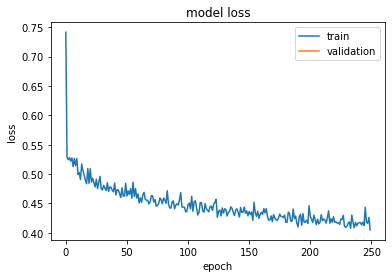

In [73]:
#loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

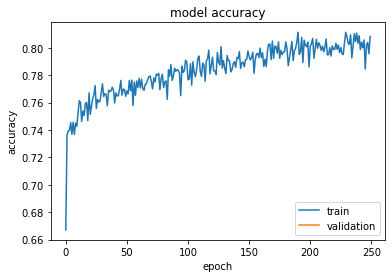

In [74]:
#accuracy
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [75]:
from tensorflow.keras.models import save_model
model.save('models/best_model.h5')

## Custom Predictions

In [76]:
y_pred = model.predict(X_test)
y_pred[5:10]

array([[0.14202783],
       [0.20151964],
       [0.13078603],
       [0.17182049],
       [0.7493745 ]], dtype=float32)

In [77]:
y_pred1 = []
for element in y_pred:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [78]:
Y_test[2:20]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
y_pred1[2:20]

[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]

In [80]:
# print the classification report
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1937
           1       0.69      0.86      0.77      1288

    accuracy                           0.79      3225
   macro avg       0.79      0.80      0.79      3225
weighted avg       0.81      0.79      0.79      3225



Text(69.0, 0.5, 'actual')

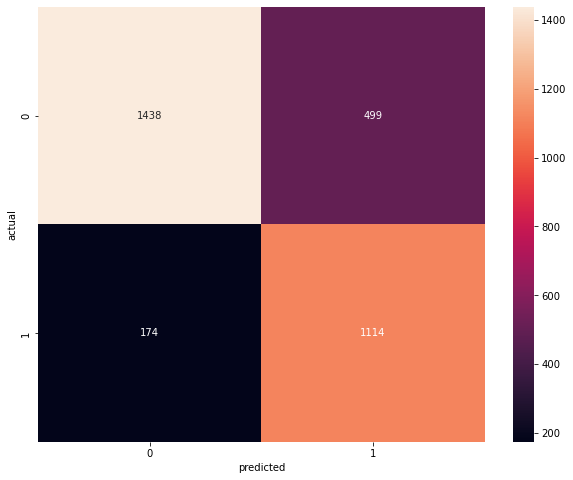

In [81]:
# heatmap
cm = tf.math.confusion_matrix(labels = Y_test, predictions = y_pred1)

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("actual")

In [82]:
X[109]

array([ 0.  , 79.  ,  0.  ,  0.  ,  1.  ,  2.  ,  0.  , 93.05, 24.2 ,
        2.  ])

In [83]:
y[109]

1

In [86]:
model.predict([[ 0.  , 79.  ,  0.  ,  0.  ,  1.  ,  2.  ,  0.  , 93.05, 24.2 ,  2. ]])

array([[0.75941366]], dtype=float32)